## geomImshow()

`geomImshow()` displays an image specified by 1D, 2D or 3D array, however native data expected by the `geomImshow` is a flat `IntArray` with pixels in `RGB`/`ARGB` color model. 

Whether the image is grayscale or color depends on the shape of the image array:
- (M, N) - grey-scale image
- (M, N, 3) - color RGB image
- (M, N, 4) - color RGB image with alpha channel



In [1]:
%useLatestDescriptors
%use lets-plot
@file:DependsOn("com.github.jai-imageio:jai-imageio-core:1.3.0")

### Reading image from a PNG file using `BufferedImage`

The easiest way to get pixel data is to call `BufferedImage.getRgb()` method as it returns pixels in `ARGB` color model, stored in `IntArray`.

In [2]:
import javax.imageio.ImageIO
import java.net.URL

val url = URL("https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png")
val img = ImageIO.read(url)

val pixels = IntArray(img.getWidth() * img.getHeight())
val fisherBoat = ImageData.fromArray(
    pixels = img.getRGB(0, 0, img.getWidth(), img.getHeight(), pixels, 0, img.getWidth()), 
    width = img.getWidth(), 
    height = img.getHeight(), 
    nChannels = 3
)
fisherBoat

ImageData: IntArray, shape: 225 x 225 x 3


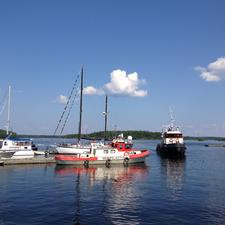

In [3]:
letsPlot() + geomImshow(fisherBoat)

### Pixel data in ByteArray
Another way to specifie pixel data with flat array is to use `ByteArray`. That way color model is still expected to be `Grey` with 1 channel and `RGB`/`ARGB` with 3/4 channels.  
Let's take only red color component to make pseudo-grayscale image.

In [4]:
val byteArrayData = ByteArray(img.getHeight() * img.getWidth() * 1)
var px = 0
for (j in (0 until img.getHeight())) {
    for (i in 0 until img.getWidth()) {
        val rgb = img.getRGB(i, j)
        val red =   ((rgb shr 16) and 0xFF).toByte()
        val green = ((rgb shr  8) and 0xFF).toByte()
        val blue =  (rgb and 0xFF).toByte()
        
        byteArrayData[px++] = red
    }
}

val fisherBoatGrayscale = ImageData.fromArray(
    pixels = byteArrayData, 
    width = img.getWidth(), 
    height = img.getHeight(), 
    nChannels = 1
)


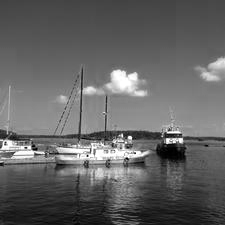

In [5]:
letsPlot() + geomImshow(fisherBoatGrayscale)